In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import *

import numpy as np
np.random.seed(7)

import torch
torch.cuda.manual_seed_all(7)

import matplotlib.pyplot as plt
plt.style.use('ggplot')

C:\Users\tanay\anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 126] The specified module could not be found
  warn(f"Failed to load image Python extension: {e}")


In [3]:
tfms = get_transforms(do_flip=True, flip_vert=True, 
                      max_lighting=0.3, max_warp=0.3, max_rotate=20., max_zoom=0.05)
len(tfms)

2

C:\Users\tanay\anaconda3\lib\site-packages\fastai\vision\transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:766.)
  return _solve_func(B,A)[0][:,0]


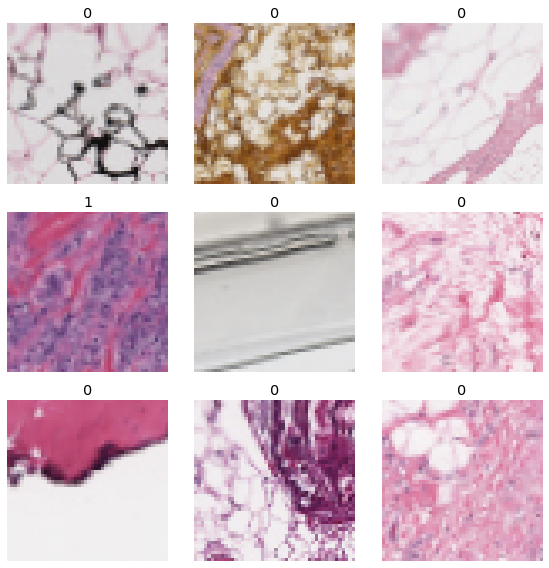

In [4]:
import os
path = "\\Users\\tanay\\OneDrive\\Desktop\\Cancer Detection\\archive"
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, valid_pct=0.2,
                                  size=48, bs=128).normalize(imagenet_stats)

data.show_batch(rows=3, figsize=(8,8))

In [5]:
# Training and validation set splits
data.label_list

LabelLists;

Train: LabelList (441831 items)
x: ImageList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: CategoryList
1,1,1,1,1
Path: \Users\tanay\OneDrive\Desktop\Cancer Detection\archive;

Valid: LabelList (110457 items)
x: ImageList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: CategoryList
1,1,0,1,1
Path: \Users\tanay\OneDrive\Desktop\Cancer Detection\archive;

Test: None

In [6]:
# Training set
from collections import Counter
train_counts = Counter(data.train_ds.y)
train_counts.most_common()

[(Category 0, 316157), (Category 1, 125674)]

In [7]:
# Validation set
valid_counts = Counter(data.valid_ds.y)
valid_counts.most_common()


[(Category 0, 79109), (Category 1, 31348)]

In [8]:
# Initializing the custom class weights and pop it to the GPU
from torch import nn

weights = [0.4, 1]
class_weights=torch.FloatTensor(weights).cuda()

epoch,train_loss,valid_loss,accuracy,time
0,0.350230,0.332057,0.857447,23:14


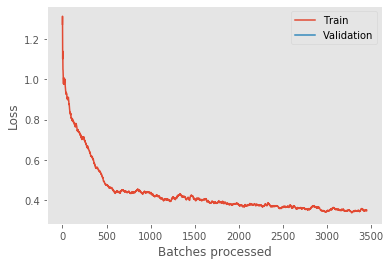

In [9]:
# Begin the training
learn = cnn_learner(data, models.resnet50, metrics=[accuracy]).to_fp32()
learn.loss_func = nn.CrossEntropyLoss(weight=class_weights)
learn.fit_one_cycle(1);
learn.recorder.plot_losses()

In [48]:
learn.export()

In [19]:
learn.path

WindowsPath('/Users/tanay/OneDrive/Desktop/Cancer Detection/archive')

In [26]:
learn = load_learner('/Users/tanay/OneDrive/Desktop/Cancer Detection/archive', 'export.pkl')

In [11]:
import cv2
import numpy as np
from skimage.io import imread
from skimage.transform import resize
p = cv2.imread("\\Users\\tanay\\OneDrive\\Desktop\\ductal-carcinoma.jpg")
img_resized = resize(p,(48,48,3))
print(img_resized.shape)# p is numpy array with shape (height,width,channels)
t = pil2tensor(img_resized, dtype=np.float32) # converts to numpy tensor
 # Move num_channels as first dimension
im = Image(t) # Convert to fastAi Image - this class has "apply_tfms" 
learn.predict(im)

(48, 48, 3)


(Category tensor(1), tensor(1), tensor([0.4610, 0.5390]))

In [ ]:
"\\Users\\tanay\\OneDrive\\Desktop\\Cancer Detection\\archive\\8863\\0\\8863_idx5_x201_y1201_class0.png"
"\\Users\\tanay\\OneDrive\\Desktop\\ductal-carcinoma.jpg"